## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import pickle

## Loading Data

In [2]:
df=pd.read_csv("/content/diabetes_risk.csv")

## EDA

In [3]:
df.sample(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
279,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
389,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
358,55,Male,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,No,No,No,Positive
329,56,Male,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
54,51,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive


**Categorical Columns**

1. Gender:  
   Indicates the gender of the patient (Male or Female).

2. Polyuria:  
   Refers to excessive urination. Polyuria is a common symptom of diabetes, particularly when blood glucose levels are high, causing the kidneys to filter out excess glucose through urine.

3. Polydipsia:  
   Refers to excessive thirst. Polydipsia is another classic symptom of diabetes, where the body attempts to compensate for the fluid loss caused by polyuria.

4. Sudden Weight Loss:  
   Indicates whether the patient has experienced sudden and unexplained weight loss. This can occur in diabetes due to the body's inability to properly use glucose, leading to the breakdown of fat and muscle for energy.

5. Weakness:  
   Refers to general fatigue or weakness. Weakness can be a symptom of diabetes, as the body struggles to use glucose efficiently for energy.

6. Polyphagia:  
   Refers to excessive hunger. Polyphagia is a symptom of diabetes where, despite eating, the body still feels hungry because it cannot effectively use glucose for energy.

7. Genital Thrush:  
   Refers to a yeast infection around the genital area. High blood sugar levels can create an environment conducive to yeast infections, making this a possible symptom of diabetes.

8. Visual Blurring:  
   Refers to blurred vision. High blood sugar can cause the lens of the eye to swell, leading to visual blurring. Persistent high glucose levels can also damage blood vessels in the retina, contributing to vision problems.

9. Itching:  
   Refers to persistent itching, particularly around the genitals or other areas of the skin. Itching can be caused by dry skin, poor circulation, or yeast infections, all of which can be linked to diabetes.

10. Irritability:  
  Refers to feelings of irritability or mood swings. This can occur in diabetes due to fluctuations in blood glucose levels, affecting mood and energy levels.

11. Delayed Healing:  
  Refers to slow healing of wounds or cuts. High blood sugar levels can impair blood flow and the immune system, leading to delayed healing.

12. Partial Paresis:  
  Refers to muscle weakness or partial paralysis. This can occur in diabetes due to nerve damage (neuropathy) caused by prolonged high blood sugar levels.

13. Muscle Stiffness:  
  Refers to stiffness in muscles. Muscle stiffness can be a result of poor circulation, nerve damage, or other complications related to diabetes.

14. Alopecia:  
  Refers to hair loss. Alopecia can occur in diabetes due to poor circulation, hormonal imbalances, or stress related to chronic illness.

15. Obesity:  
  Indicates whether the patient is obese. Obesity is a major risk factor for type 2 diabetes as it can lead to insulin resistance, where the body’s cells do not respond properly to insulin.

16. Class (Target):  
  The target variable indicating whether the patient has diabetes (`Positive`) or does not have diabetes (`Negative`). This is what your model will predict based on the other features.




In [4]:
df.shape

(520, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


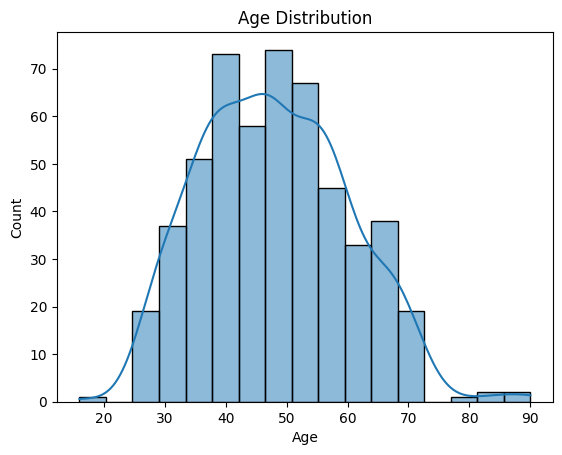

In [8]:
sns.histplot(df['Age'], kde=True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

The  age distribution appears roughly normal, centered around the age group of 40-50 years and few outliers can be seen for age between 80-90 years.

In [9]:
categorical_cols=['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity','class']

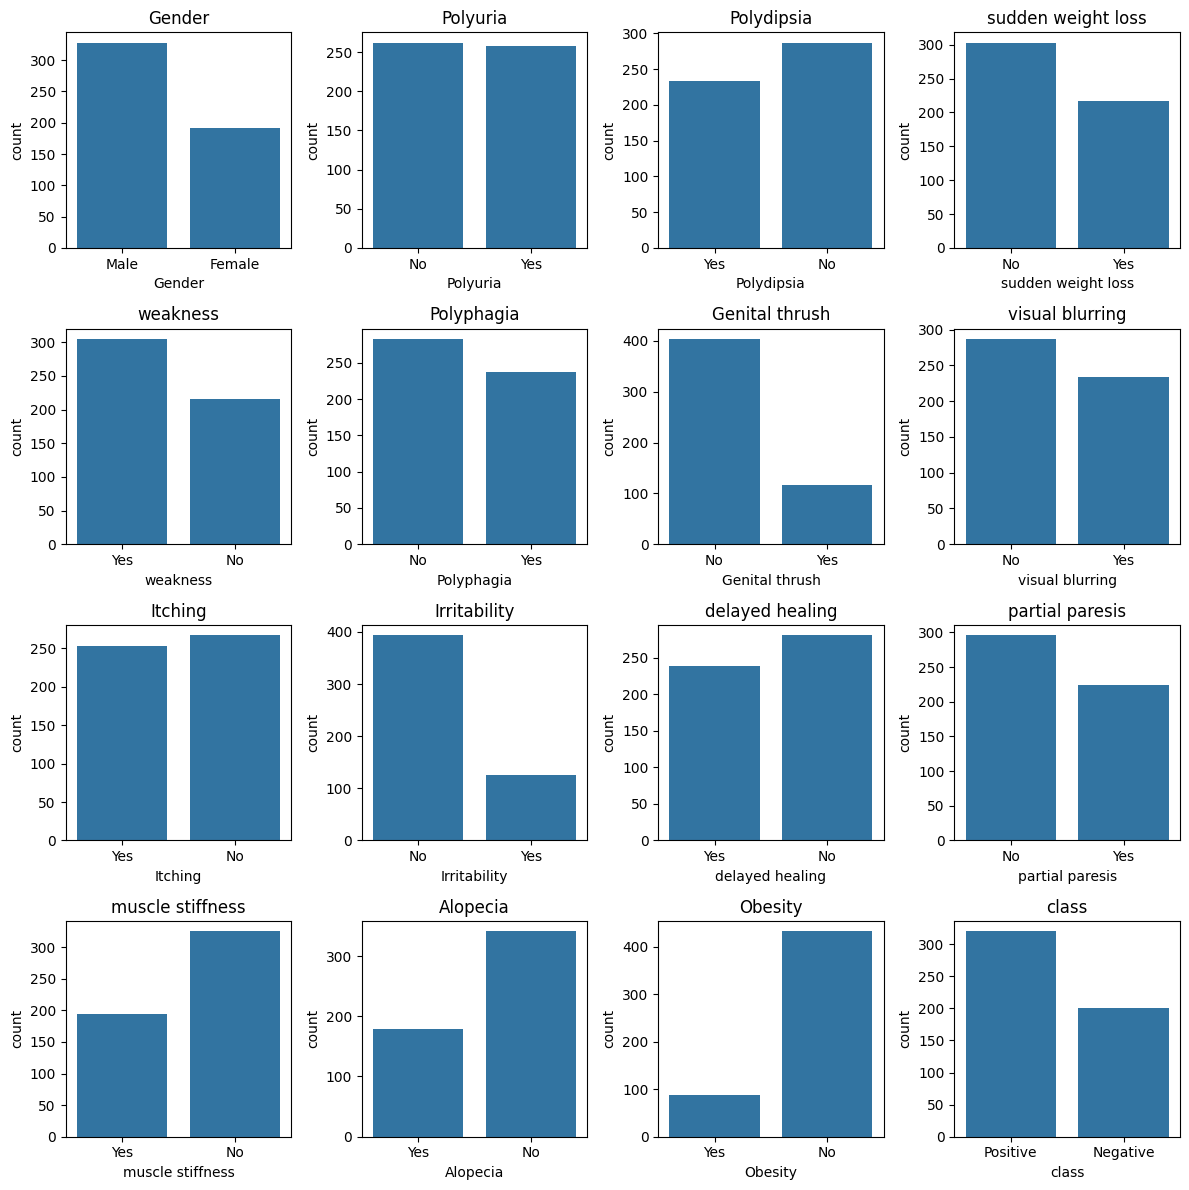

In [10]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column
for i in range(len(categorical_cols)):
    sns.countplot(x=categorical_cols[i], data=df, ax=axes[i])
    axes[i].set_title(f'{categorical_cols[i]}')
    axes[i].set_xlabel(categorical_cols[i])

plt.tight_layout()
plt.show()


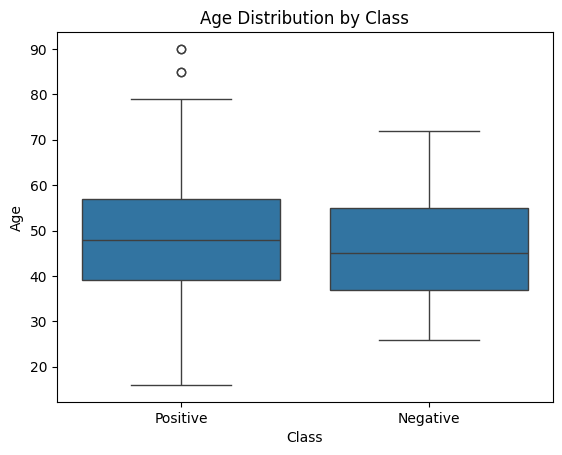

In [11]:
sns.boxplot(x='class', y='Age', data=df)
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

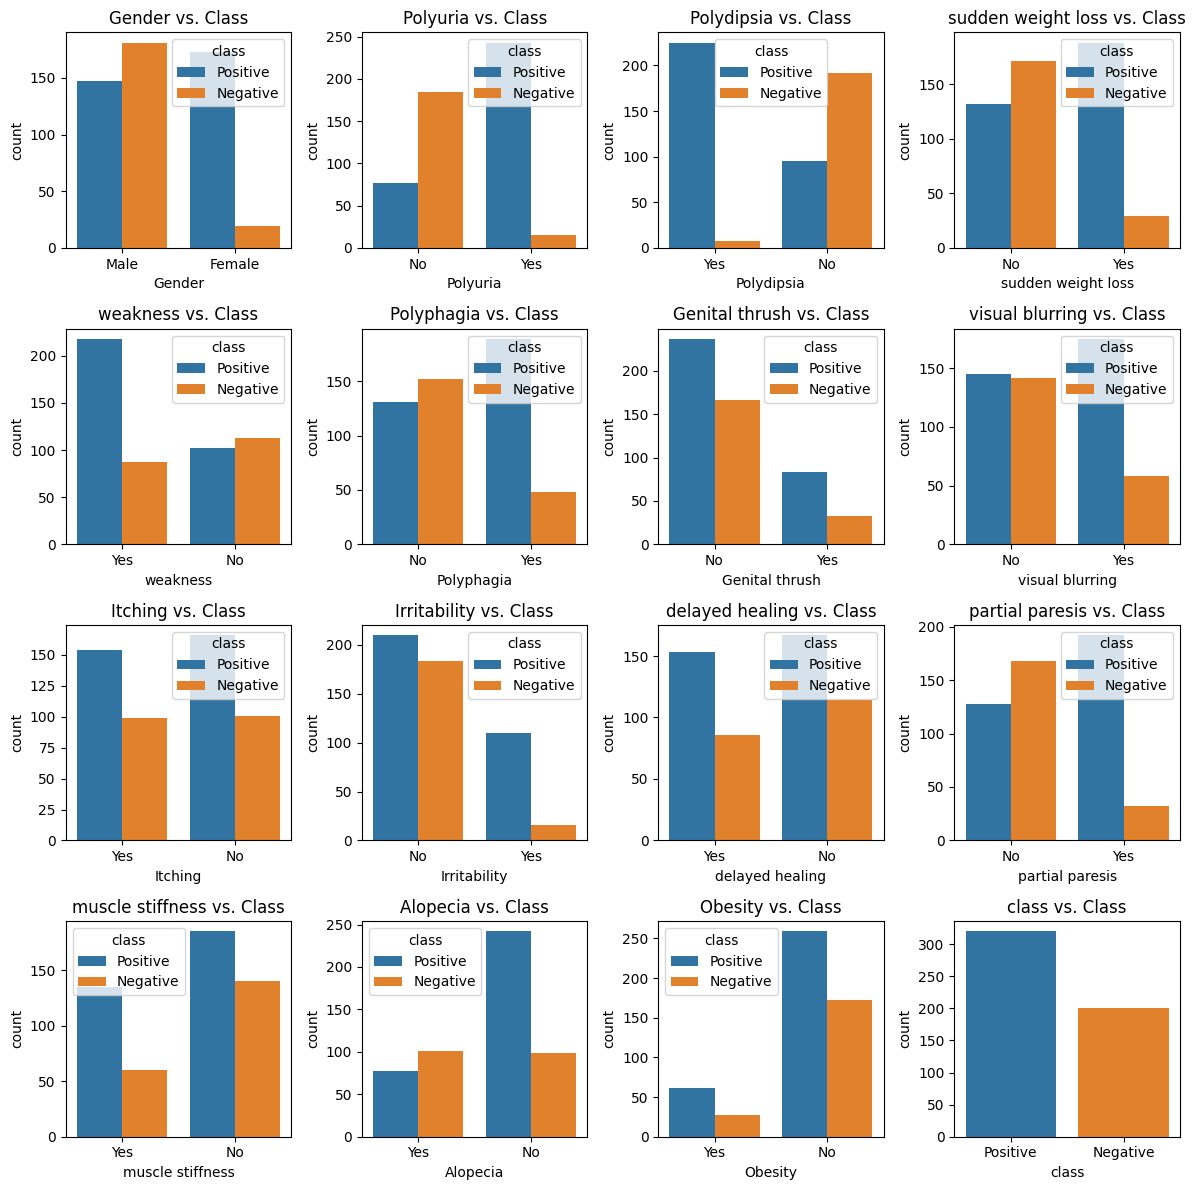

In [12]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column
for i in range(len(categorical_cols)):
    sns.countplot(x=categorical_cols[i], hue='class', data=df, ax=axes[i])
    axes[i].set_title(f'{categorical_cols[i]} vs. Class')
    axes[i].set_xlabel(categorical_cols[i])

plt.tight_layout()
plt.show()


In [13]:
# Create age groups
bins = range(0, 100, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and count target variable class
result = df.groupby('age_group')['class'].value_counts().unstack(fill_value=0)

# Sort by 'Positive' class in descending order
result_sorted = result.sort_values('Positive', ascending=False)

# Display the result
print(result_sorted)

class      Negative  Positive
age_group                    
40-49            63        88
50-59            49        81
30-39            47        77
60-69            20        56
20-29            12         7
70-79             9         6
80-89             0         2
10-19             0         1
0-9               0         0


<ipython-input-13-974769728b7e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('age_group')['class'].value_counts().unstack(fill_value=0)


## Splitting data into Features and Target Variable

In [23]:
x=df.drop(columns=['class','age_group'])
y=df['class']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=48)

## Encoding Categorical Features into Binary and Prepare Data Pipeline

In [25]:
# Identify categorical features (excluding 'Age')
categorical_features = x.columns[x.dtypes == 'object']

# Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # This will keep the 'Age' column as is
)


## Encoding Target Class

In [26]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Splitting data into Training and Testing Set

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=48)

## Building Decision Tree Model

In [28]:
# Define the pipeline for Decision Tree
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=48))
])

In [29]:
pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object'))])),
                ('DecisionTreeClassifier',
                 DecisionTreeClassifier(random_state=48))])

In [44]:
# Train and evaluate Decision Tree
pipeline_dt.fit(x_train, y_train)
dt_pred = pipeline_dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, dt_pred)
print('Decision Tree Accuracy: ', accuracy_dt)


Decision Tree Accuracy:  1.0


In [45]:
# Calculate training accuracy
training_accuracy = pipeline_dt.score(x_train, y_train)
print(f'Training Accuracy: {training_accuracy:.4f}')

Training Accuracy: 1.0000


In [46]:
# Perform 10-fold cross-validation
scores = cross_val_score(pipeline_dt, x, y_encoded, cv=10)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.88461538 0.94230769 0.94230769 0.98076923 0.92307692 1.
 0.98076923 1.         1.         0.98076923]
Average cross-validation score: 0.9634615384615384


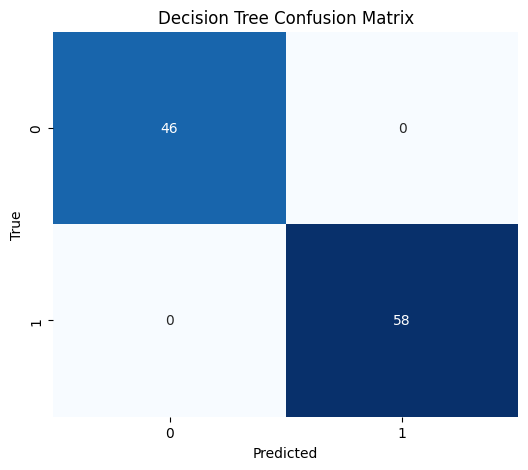

In [31]:
# Confusion Matrix for Decision Tree
confusion_dt = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
confusion_dt = confusion_matrix(y_test, dt_pred)
print(confusion_dt)

[[46  0]
 [ 0 58]]


In [33]:
# Classification Report for Decision Tree
print("Decision Tree Classification Report")
print(classification_report(y_test, dt_pred, target_names=['Negative', 'Positive']))

Decision Tree Classification Report
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        46
    Positive       1.00      1.00      1.00        58

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



## Building Random Forest Model

In [34]:
# Define the pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('RandomForestclassifier', RandomForestClassifier(random_state=48))
])

In [35]:
pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object'))])),
                ('RandomForestclassifier',
                 RandomForestClassifier(random_state=48))])

In [47]:
# Train and evaluate Random Forest
pipeline_rf.fit(x_train, y_train)
rf_pred = pipeline_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
print(' Random Forest Accuracy: ', accuracy_rf)

 Random Forest Accuracy:  0.9903846153846154


In [37]:
# Calculate training accuracy
training_accuracy = pipeline_rf.score(x_train, y_train)

print(f'Training Accuracy: {training_accuracy:.4f}')

Training Accuracy: 1.0000


In [38]:
# Perform 5-fold cross-validation
scores = cross_val_score(pipeline_rf, x, y_encoded, cv=10)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.94230769 0.98076923 0.96153846 1.         0.92307692 1.
 0.98076923 1.         1.         1.        ]
Average cross-validation score: 0.9788461538461538


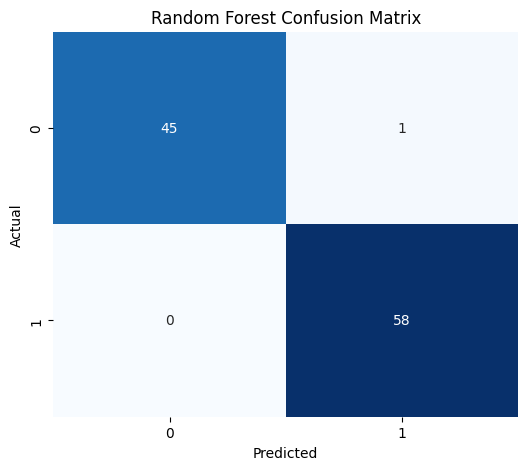

In [48]:
# Confusion Matrix for Random Forest
confusion_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
# Classification Report for Random Forest
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred, target_names=['Negative', 'Positive']))

Random Forest Classification Report
              precision    recall  f1-score   support

    Negative       1.00      0.98      0.99        46
    Positive       0.98      1.00      0.99        58

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## ROC Curve for Decision Tree and Random Forest

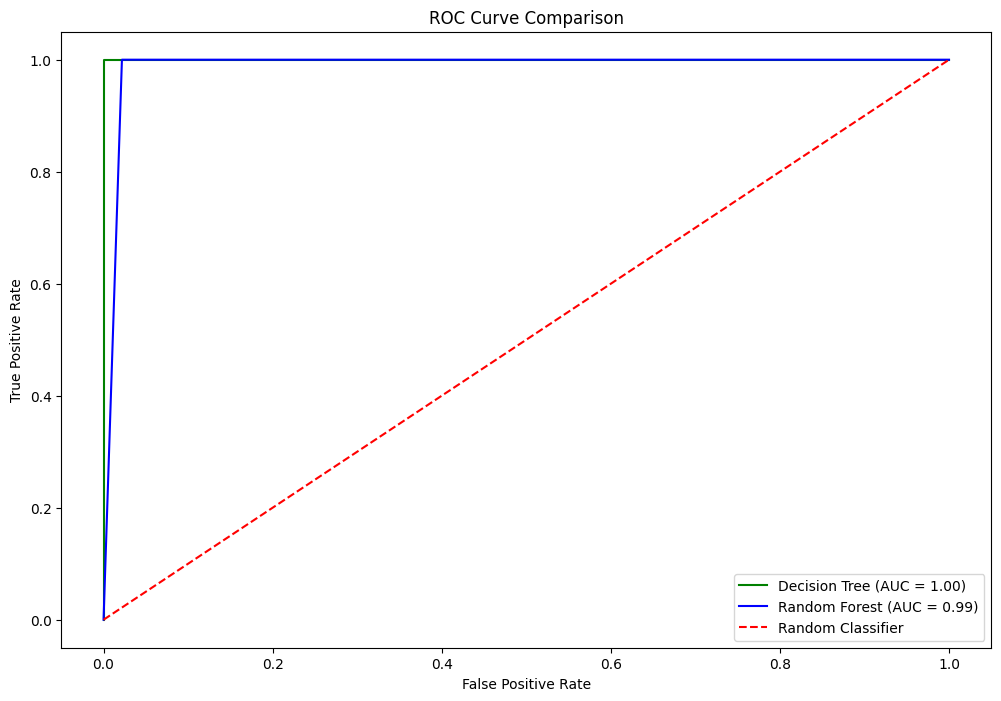

In [42]:
# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred)
auc_dt = auc(fpr_dt, tpr_dt)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(12, 8))

# Plot ROC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## Pickle is used to deploy the model using Streamlit as a web interface.

In [ ]:
pickle.dump(pipeline_rf, open('pipe.pkl','wb'))

### Conclusion

In this project, we aimed to predict diabetes risk using a dataset comprising 16 features, including demographic data (Age, Gender) and various health-related symptoms (e.g., Polyuria, Polydipsia, Sudden Weight Loss). The target variable indicated whether a patient was diabetic (Positive) or not (Negative). The dataset was imbalanced, with more positive cases than negative ones.

From the exploratory data analysis (EDA), we observed that several features showed a significant relationship with the target variable. Symptoms such as Polyuria, Polydipsia, and Sudden Weight Loss were more prevalent among diabetic patients. Age also played a critical role, with older individuals being more likely to have diabetes.

After building and evaluating models using both Decision Tree and Random Forest algorithms, initial results showed that both models had 100% accuracy on the training set. However, on the test set, the Decision Tree model achieved an accuracy of 100%, indicating potential overfitting. The Random Forest model achieved testing accuracy of 99%, but it also seemed to overfit.

To address this, 10-fold cross-validation is applied to both models. The Decision Tree achieved an average cross-validation score of 0.96, while the Random Forest model achieved a slightly higher average score of 0.97. These results suggest that while both models are effective, the Random Forest model offers a marginally better balance between training and testing accuracy.

The confusion matrix for the Random Forest model showed 45 true negatives, 58 true positives, 1 false positive, and 0 false negative, indicating that the model is highly accurate in predicting both positive and negative cases, with minimal misclassifications. The high precision and recall values, as seen in the classification report, further affirm the model's effectiveness in identifying diabetic patients.

After building and evaluating models using both Decision Tree and Random Forest algorithms, the Random Forest model achieved a higher accuracy of 97.88% compared to the Decision Tree's accuracy of 96.34%. The superior performance of the Random Forest model can be attributed to its ensemble nature, which combines multiple decision trees to produce more accurate and robust predictions. This method reduces the likelihood of overfitting, a common issue in standalone Decision Trees when they become too complex.

Overall, the Random Forest model demonstrates strong potential for accurately predicting diabetes risk, making it a valuable tool for early detection and intervention.